In [3]:
pip install torch


     ---------------------------------------- 0.0/536.2 kB ? eta -:--:--
     ------- ------------------------------ 112.6/536.2 kB 2.2 MB/s eta 0:00:01
     --------------- ---------------------- 225.3/536.2 kB 2.3 MB/s eta 0:00:01
     ---------------------- --------------- 317.4/536.2 kB 2.2 MB/s eta 0:00:01
     ----------------------- -------------- 337.9/536.2 kB 1.7 MB/s eta 0:00:01
     -------------------------------------- 536.2/536.2 kB 2.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/198.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/198.6 MB 2.6 MB/s eta 0:01:16
   ---------------------------------------- 0.2/198.6 MB 3.0 MB/s eta 0:01:07
   ---------------------------------------- 0.2/198.6 MB 1.7 MB/s eta 0:01:56
   ---------------------------------------- 0.5/198.6 MB 2.6 MB/s eta 0:01:18
   ---------------------------------------- 0.6/198.6 MB 2.5 MB/s eta 0:01:19
   ---------------------------------------- 0.7/198.6 MB 2.4 MB/s

In [12]:
pip install yfinance

     ---------------------------------------- 0.0/314.6 kB ? eta -:--:--
     ---- -------------------------------- 41.0/314.6 kB 960.0 kB/s eta 0:00:01
     --------------------- ---------------- 174.1/314.6 kB 2.1 MB/s eta 0:00:01
     -------------------------------------  307.2/314.6 kB 2.4 MB/s eta 0:00:01
     -------------------------------------- 314.6/314.6 kB 1.9 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     - -------------------------------------- 0.1/3.0 MB 3.2 MB/s eta 0:00:01
     --- -------------

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import torch
import torch.nn as nn
import yfinance as yf

In [52]:
AMZN = yf.download('AMZN', 
                      start='1997-05-15', 
                      end='2023-04-6', 
                      progress=False,
)
AMZN

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000
...,...,...,...,...,...,...
2023-03-30,101.550003,103.040001,101.010002,102.000000,102.000000,53633400
2023-03-31,102.160004,103.489998,101.949997,103.290001,103.290001,56750300
2023-04-03,102.300003,103.290001,101.430000,102.410004,102.410004,41135700


In [59]:
data=AMZN['Close']
data=data.reset_index()
data=data.rename(columns={'Date':'date','Close':'close'})
data

,date,close
0,1997-05-15,0.097917
1,1997-05-16,0.086458
2,1997-05-19,0.085417
3,1997-05-20,0.081771
4,1997-05-21,0.071354
...,...,...
6511,2023-03-30,102.000000
6512,2023-03-31,103.290001
6513,2023-04-03,102.410004
6514,2023-04-04,103.949997


In [60]:
device='cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [61]:
data.date=pd.to_datetime(data.date)

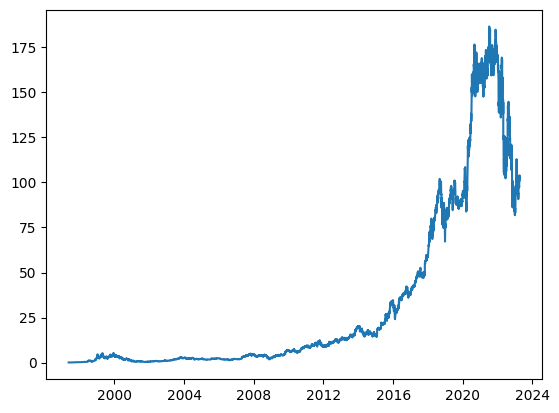

In [62]:
plt.plot(data.date,data.close)

In [86]:
data

,date,close
0,1997-05-15,0.097917
1,1997-05-16,0.086458
2,1997-05-19,0.085417
3,1997-05-20,0.081771
4,1997-05-21,0.071354
...,...,...
6511,2023-03-30,102.000000
6512,2023-03-31,103.290001
6513,2023-04-03,102.410004
6514,2023-04-04,103.949997


In [94]:
def look_back(data,lookback):
    df=data.copy()
    for i in range(1,lags+1):
        df[f'close(t-{i})']=data.close.shift(i)
    df.dropna(inplace=True)
    df=df.set_index('date')
    return df 


In [126]:
lookback=7
shifted_data=look_back(data,lookback)
shifted_data

,close,close(t-1),close(t-2),close(t-3),close(t-4),close(t-5),close(t-6),close(t-7)
date,,,,,,,,
1997-05-27,0.079167,0.075000,0.069792,0.071354,0.081771,0.085417,0.086458,0.097917
1997-05-28,0.076563,0.079167,0.075000,0.069792,0.071354,0.081771,0.085417,0.086458
1997-05-29,0.075260,0.076563,0.079167,0.075000,0.069792,0.071354,0.081771,0.085417
1997-05-30,0.075000,0.075260,0.076563,0.079167,0.075000,0.069792,0.071354,0.081771
1997-06-02,0.075521,0.075000,0.075260,0.076563,0.079167,0.075000,0.069792,0.071354
...,...,...,...,...,...,...,...,...
2023-03-30,102.000000,100.250000,97.239998,98.040001,98.129997,98.709999,98.699997,100.610001
2023-03-31,103.290001,102.000000,100.250000,97.239998,98.040001,98.129997,98.709999,98.699997
2023-04-03,102.410004,103.290001,102.000000,100.250000,97.239998,98.040001,98.129997,98.709999


In [114]:
from sklearn.preprocessing import MinMaxScaler
shifted_data_np=shifted_data.to_numpy()
sc=MinMaxScaler(feature_range=(-1,1))
shifted_data_np=sc.fit_transform(shifted_data_np)

In [115]:
shifted_data_np

array([[-0.99991063, -0.99995531, -1.        , ..., -0.99983244,
        -0.99982128, -0.99969839],
       [-0.99993855, -0.99991063, -0.99994415, ..., -0.99987154,
        -0.99983244, -0.99982128],
       [-0.99995253, -0.99993855, -0.99989946, ..., -0.99998325,
        -0.99987154, -0.99983244],
       ...,
       [ 0.09747298,  0.10690997,  0.09308122, ...,  0.0506149 ,
         0.05158   ,  0.05779984],
       [ 0.11398769,  0.09747298,  0.10691495, ...,  0.04203581,
         0.0506149 ,  0.05158   ],
       [ 0.08342465,  0.11398769,  0.09747802, ...,  0.07431453,
         0.04203581,  0.0506149 ]])

In [116]:
X=shifted_data_np[:,1:]
y=shifted_data_np[:,0]
print(X.shape,y.shape)

(6509, 7) (6509,)


In [117]:
split_index=int(len(X)*0.95)
split_index

6183

In [132]:
X_train=X[:split_index]
X_test=X[split_index:]
y_train=y[:split_index]
y_test=y[split_index:]
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)


(6183, 7) (326, 7) (6183,) (326,)


In [133]:
X_train=X_train.reshape((-1,lookback,1))
X_test=X_test.reshape((-1,lookback,1))

y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [134]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)


(6183, 7, 1) (326, 7, 1) (6183, 1) (326, 1)


In [138]:
X_train=torch.tensor(X_train).float()
X_test=torch.tensor(X_test).float()

y_train=torch.tensor(y_train).float()
y_test=torch.tensor(y_test).float()
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)


torch.Size([6183, 7, 1]) torch.Size([326, 7, 1]) torch.Size([6183, 1]) torch.Size([326, 1])


C:\Users\lenovothinkpad\AppData\Local\Temp\ipykernel_26844\3074428473.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train=torch.tensor(X_train).float()
C:\Users\lenovothinkpad\AppData\Local\Temp\ipykernel_26844\3074428473.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test=torch.tensor(X_test).float()
C:\Users\lenovothinkpad\AppData\Local\Temp\ipykernel_26844\3074428473.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train=torch.tensor(y_train).float()
C:\Users\lenovothinkpad\AppData\Local\Temp\ipykernel_26844\3074428

In [145]:
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self,X,y):
        self.X=X
        self.y=y
    def __len__(self):
        return len(self.X)
    def __getitem__(self,i):
        return self.X[i],self.y[i]
    

train_dataset=TimeSeriesDataset(X_train,y_train)
test_dataset =TimeSeriesDataset(X_test,y_test)
train_dataset.__getitem__(0)
train_dataset[0]

In [162]:
from torch.utils.data import DataLoader

batch_size=16
train_loader =DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
test_loader =DataLoader (test_dataset,batch_size=batch_size,shuffle=True)


In [168]:
for i,batch in enumerate(train_loader):
    x_batch,y_batch=batch[0].to(device),batch[1].to(device)
    print(x_batch.shape,y_batch.shape,i)
    break

torch.Size([16, 7, 1]) torch.Size([16, 1]) 0


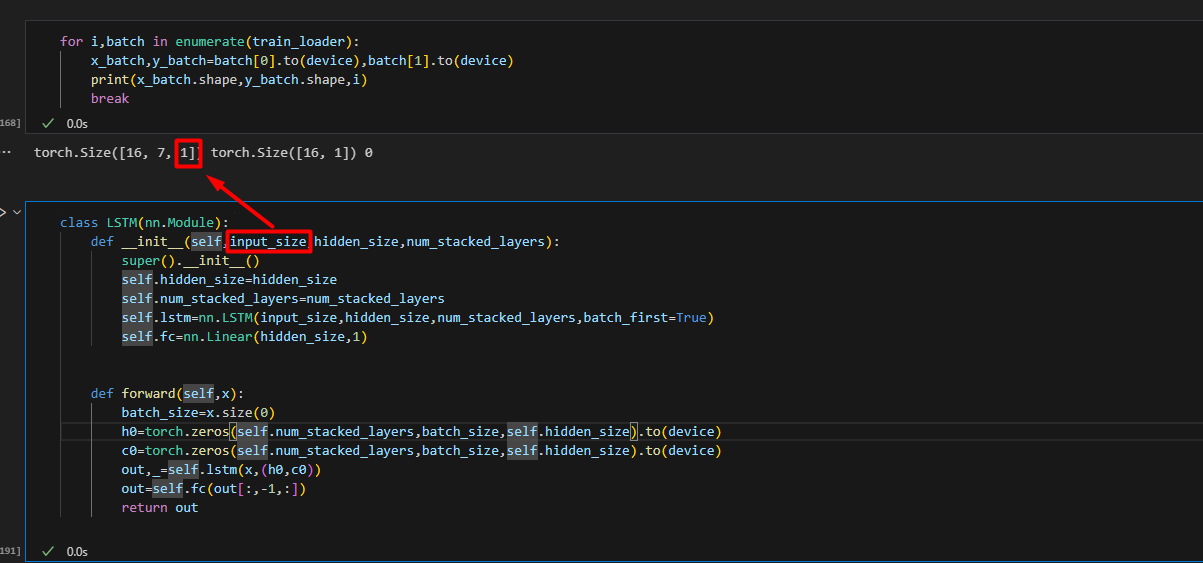

In [191]:
class LSTM(nn.Module):
    def __init__(self,input_size,hidden_size,num_stacked_layers):
        super().__init__()
        self.hidden_size=hidden_size
        self.num_stacked_layers=num_stacked_layers
        self.lstm=nn.LSTM(input_size,hidden_size,num_stacked_layers,batch_first=True)
        self.fc=nn.Linear(hidden_size,1)
    

    def forward(self,x):
        batch_size=x.size(0)
        h0=torch.zeros(self.num_stacked_layers,batch_size,self.hidden_size).to(device)
        c0=torch.zeros(self.num_stacked_layers,batch_size,self.hidden_size).to(device)
        out,_=self.lstm(x,(h0,c0))
        out=self.fc(out[:,-1,:])
        return out
    

In [192]:
model=LSTM(1,4,1)
model.to(device)
model

LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

In [203]:


def train_one_epoch():
    model.train(True)
    print(f'Epoch :{epoch+1}')
    running_loss=0
    for batch_index,batch in enumerate(train_loader):
        x_batch,y_batch=batch[0].to(device),batch[1].to(device)
        output=model(x_batch)
        loss=loss_function(output,y_batch)
        running_loss=loss.item()+running_loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


        if batch_index %100==99 :#print every batches
            avg_loss_across_batches=running_loss/100
            print('batch {0},loss:{1:.3f}'.format(batch_index+1,avg_loss_across_batches))
            running_loss=0
    print()


def validate_one_epoch():
    model.train(False)
    running_loss=0
    for batch_index,batch in enumerate(test_loader):
        x_batch,y_batch=batch[0].to(device),batch[1].to(device)

        with torch.no_grad():
            output=model(x_batch)
            loss=loss_function(output,y_batch)
            running_loss+=loss.item()
    avg_loss_across_batches=running_loss/len(test_loader)
    print('val Loss {0:.3f}'.format(avg_loss_across_batches))
    print('************************************************')
    print()







In [204]:
learning_rate=0.001
num_epochs=10
loss_function=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)

for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch :1
batch 100,loss:0.000
batch 200,loss:0.000
batch 300,loss:0.000

val Loss 0.006
************************************************

Epoch :2
batch 100,loss:0.000
batch 200,loss:0.000
batch 300,loss:0.000

val Loss 0.005
************************************************

Epoch :3
batch 100,loss:0.000
batch 200,loss:0.000
batch 300,loss:0.000

val Loss 0.006
************************************************

Epoch :4
batch 100,loss:0.000
batch 200,loss:0.000
batch 300,loss:0.000

val Loss 0.005
************************************************

Epoch :5
batch 100,loss:0.000
batch 200,loss:0.000
batch 300,loss:0.000

val Loss 0.005
************************************************

Epoch :6
batch 100,loss:0.000
batch 200,loss:0.000
batch 300,loss:0.000

val Loss 0.006
************************************************

Epoch :7
batch 100,loss:0.000
batch 200,loss:0.000
batch 300,loss:0.000

val Loss 0.005
************************************************

Epoch :8
batch 100,loss:0.000
batc

In [206]:
X_train.shape

torch.Size([6183, 7, 1])

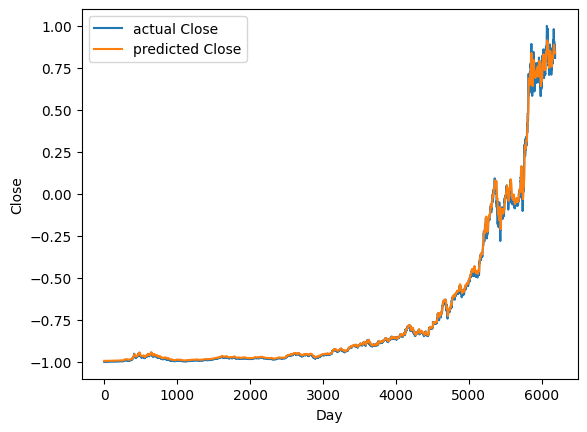

In [208]:
with torch.no_grad():
    predicted=model(X_train.to(device)).to('cpu').numpy()

plt.plot(y_train,label='actual Close')
plt.plot(predicted,label='predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

In [226]:
train_predictions=predicted.flatten()
dummies=np.zeros([X_train.shape[0],lookback+1])
dummies[:,0]=train_predictions
dummies=sc.inverse_transform(dummies)
train_predictions=dummies[:,0]
train_predictions

array([  0.66471845,   0.66079441,   0.65908251, ..., 171.75371782,
       171.48701684, 171.42569963])

In [224]:
dummies=np.zeros([X_train.shape[0],lookback+1])
dummies[:,0]=y_train.flatten()
dummies=sc.inverse_transform(dummies)
new_y_train=dummies[:,0]
new_y_train

array([7.91646240e-02, 7.65634224e-02, 7.52572635e-02, ...,
       1.69091505e+02, 1.73315000e+02, 1.68871003e+02])

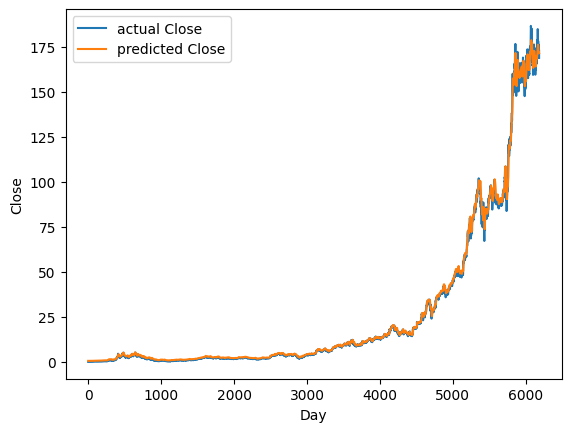

In [227]:
with torch.no_grad():
    predicted=model(X_train.to(device)).to('cpu').numpy()

plt.plot(new_y_train,label='actual Close')
plt.plot(train_predictions,label='predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

In [228]:
test_predictions=model(X_test.to(device)).detach().cpu().numpy().flatten()
dummies=np.zeros([X_test.shape[0],lookback+1])
dummies[:,0]=test_predictions
dummies=sc.inverse_transform(dummies)
test_predictions=dummies[:,0]
test_predictions

array([170.64187088, 170.16786859, 169.49211755, 169.53346998,
       169.75764576, 169.71519281, 169.62257225, 169.74790237,
       169.81770684, 169.71168564, 169.20113869, 169.20323966,
       168.87928445, 168.11738806, 167.29994378, 166.51168521,
       165.73731639, 165.43211985, 165.10705858, 164.48900641,
       164.27179496, 163.66414204, 162.78239584, 161.01215587,
       157.55399175, 154.84686344, 151.58395618, 148.36745368,
       145.76735815, 144.45835347, 144.96427051, 146.33208569,
       147.5953359 , 147.1058987 , 150.20138974, 152.82224486,
       155.17748283, 156.81362196, 157.91791541, 158.78028044,
       159.72417202, 159.55527733, 159.42033166, 158.49613251,
       157.40642358, 156.42518142, 154.81108024, 154.27849533,
       153.97288194, 153.67706751, 153.29550792, 153.38769495,
       153.22360248, 152.73454323, 150.14751485, 147.30870349,
       145.37787823, 144.99594625, 144.43974487, 143.6472121 ,
       144.52293886, 147.18775317, 150.39241131, 153.38

In [229]:
dummies=np.zeros([X_test.shape[0],lookback+1])
dummies[:,0]=y_test.flatten()
dummies=sc.inverse_transform(dummies)
y_test=dummies[:,0]
y_test

array([170.01749913, 167.07899727, 170.4170059 , 171.03700341,
       171.06849574, 169.66949393, 170.66099638, 169.20100529,
       168.64449822, 166.71699672, 170.40449456, 167.52200192,
       164.35699543, 163.25399702, 162.55400145, 161.48599142,
       165.36199857, 165.20699919, 161.21400467, 162.13799817,
       158.91749382, 156.29899535, 151.66749476, 142.64300378,
       144.54400415, 139.98599307, 138.87249814, 139.63749597,
       143.97799824, 149.57349969, 151.19349803, 150.61250187,
       138.84550512, 157.63949791, 157.93550131, 161.41349682,
       161.18949891, 159.00349466, 153.29350144, 155.16700577,
       156.5104986 , 158.1004942 , 154.65249588, 152.601504  ,
       150.19749349, 144.82699598, 151.3580018 , 153.78849676,
       153.56300371, 151.14199646, 152.05250595, 147.89849816,
       145.64100534, 137.45300353, 136.01449459, 139.27900815,
       146.81750436, 145.52450708, 141.8529944 , 147.36650241,
       153.10400279, 157.23899624, 161.25050487, 161.49

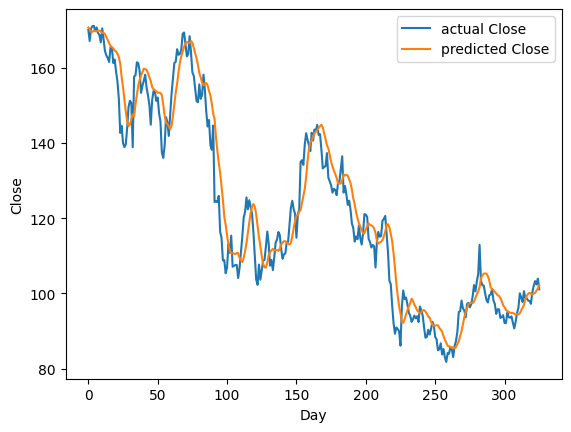

In [230]:
plt.plot(y_test,label='actual Close')
plt.plot(test_predictions,label='predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()